<a href="https://colab.research.google.com/github/geomaticajavl/https-api.openrouteservice.org/blob/master/tablas_graficos_estad%C3%AD_datos_masivos_multiples_tabla_masfi_sc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####
Manejo de datos masivos en varias tablas (mismo directorio)

In [1]:
#pip install --upgrade scipy #reinstalar de ser necesario
!pip install xlsxwriter #reinstalar de ser necesario
!pip install openpyxl #reinstalr siempre
!pip install odfpy #reinstalr siempre
!pip install xlwt # reisntalar siempre
!pip install xlrd # reinstalar siempre para dar lectura a archivos .xls
!pip install polars
!pip install pytz # requerido para fijar husos horarios
#!pip install sqlalchemy
#!pip install --upgrade sqlalchemy
#!pip install update

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=568b25aa444b63497691fc963c39dd7e40aad844a7df99a8265d04ea22ea9651
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.1 MB/s eta 0:00:00


In [2]:
# Caja de importación de módulos/librerías
import pandas as pd
#import sqlalchemy
import polars as pl
import random
import scipy
from scipy.stats import randint
import scipy.stats as stats
import numpy as np
from datetime import datetime
from openpyxl import load_workbook
import chardet
import openpyxl
import xlrd
import csv
import re
import os
import datetime
import pytz

In [3]:

#@title Función para limpiar la carpeta temporal /content/ de google colab

# Obtiene la ruta a la carpeta `content`
ruta_content = os.getcwd()

# Obtiene una lista de todos los archivos .xlsx de la carpeta /content/
archivos_xlsx_xls_csv = [archivo for archivo in os.listdir(ruta_content)\
                 if archivo.endswith(".xlsx") or archivo.endswith(".csv")\
                 or archivo.endswith(".xls") or archivo.endswith(".ods")]

# Elimina todos los archivos .xlsx de la carpeta `content`
for archivo in archivos_xlsx_xls_csv:
    os.remove(os.path.join(ruta_content, archivo))

# Imprime un mensaje de confirmación
print("Los archivos .xlsx/.xls/.csv/.ods/ temporales han sido borrados")

Los archivos .xlsx/.xls/.csv/.ods/ temporales han sido borrados


In [4]:
#@title Carga de datos masivos almacenados en una sola carpeta. Ejemplo múltiple archivos de .xlsx o .csv
'''Tips para cargar varios archivos .xlsx/.xls/.csv desde una carpeta local a Google Colab:

Pendiente acá con lo siguiente:
1. La función `os.listdir()` y el módulo glob por lo general da fallos en
Google Colab (si funciona en jupyter) para listar archivos
en máquina local, esto se debe a que Google Colab se ejecuta en un entorno de
servidor remoto y no en la PC.

2. La función `google.colab.files.upload()` abre un cuadro de diálogo para cargar
archivos manualmente y no toma ningún argumento. Ojo No puede usarse
 para cargar archivos automáticamente desde una ruta específica.


```javl'''
import google.colab.files

def subir_archivos():
    print("Cargar los archivos .xlsx; .xls; .csv; ods")
    archivos_subidos = google.colab.files.upload()

    for nombre_archivo in archivos_subidos.keys():
        print('Se ha subido el archivo "{nombre}" con longitud {longitud} bytes'.format(
            nombre=nombre_archivo, longitud=len(archivos_subidos[nombre_archivo])))
subir_archivos()

Cargar los archivos .xlsx; .xls; .csv; ods


Saving CIEPE Sagrado Corazon de Jesus.xlsx to CIEPE Sagrado Corazon de Jesus.xlsx
Saving Ignición Espacial 21_05_2024.xlsx to Ignición Espacial 21_05_2024.xlsx
Saving Ruta Científica Agroproductiva 20 de mayo 2024.xlsx to Ruta Científica Agroproductiva 20 de mayo 2024.xlsx
Se ha subido el archivo "CIEPE Sagrado Corazon de Jesus.xlsx" con longitud 121301 bytes
Se ha subido el archivo "Ignición Espacial 21_05_2024.xlsx" con longitud 143725 bytes
Se ha subido el archivo "Ruta Científica Agroproductiva 20 de mayo 2024.xlsx" con longitud 120727 bytes


**Opcional. Script sólo para transformar archivos corruptos de tipo .xls a .csv**

In [ ]:
#@title Recorre cada archivo .xls y pasarlo a a '.csv'. Luego guardar en'/content' manteniendo
# Usar sólo si es strctamente necesario
# el nombre original de cada cada archivo .xls anterior. Porque los .xls son un
# peo para procesarlos

# Obtener la lista de archivos .xls en el directorio actual
archivos_xls = [archivo for archivo in os.listdir() if archivo.endswith('.xls')]

# Convertir cada archivo .xls a .csv
for archivo_xls in archivos_xls:
    # Abrir el archivo .xls
    libro_xls = xlrd.open_workbook(archivo_xls)

    # Obtener la primera hoja de cálculo del libro
    hoja_xls = libro_xls.sheet_by_index(0)

    # Crear el nombre del archivo .csv
    archivo_csv = archivo_xls.replace('.xls', '.csv')

    # Abrir el archivo .csv para escritura
    with open(archivo_csv, 'w', newline='') as archivo_csv:
        # Crear el escritor de CSV
        escritor_csv = csv.writer(archivo_csv)

        # Escribir la fila de encabezado
        escritor_csv.writerow(hoja_xls.row_values(0))

        # Escribir las filas de datos
        for fila in range(1, hoja_xls.nrows):
            escritor_csv.writerow(hoja_xls.row_values(fila))

    # Imprimir un mensaje de confirmación
    print(f'El archivo "{archivo_xls}" se ha convertido a "{archivo_csv}"')


In [ ]:
#@title No usar. Este código para carga de archivos masivos distribuidos en subcarpetas aún está en periodo de pruebas
ruta_carpeta= "C:\\plan_masif_sc\ENTES peq-20240208T153242Z-001\\ENTES peq\\15-01 al 02-02\\_"
def subir_archivos_varias_carpetas():
  carpetas = []
  while True:
    # Solicitar la ruta de la carpeta al usuario
    ruta_carpeta = input("Ingrese la ruta de la carpeta (o 'fin' para terminar): ")
    if ruta_carpeta == "fin":
      break
    carpetas.append(ruta_carpeta)

  # Subir archivos de cada carpeta
  for carpeta in carpetas:
    print(f"Subiendo archivos de la carpeta '{carpeta}'")
    os.chdir(carpeta)
    archivos_subidos = google.colab.files.upload()

    for nombre_archivo in archivos_subidos.keys():
      print(f'Se ha subido el archivo "{nombre_archivo}" con longitud {len(archivos_subidos[nombre_archivo])} bytes')

subir_archivos_varias_carpetas()

# Recorrer todos los archivos .xlsx en la carpeta '_' y sus subcarpetas
for root, dirs, files in os.walk(__path):
    for file in files:
        if file.endswith('.xlsx'):
            file_path = os.path.join(root, file)

            # Leer el archivo .xlsx en un DataFrame de pandas
            df = pd.read_excel(file_path)

            # Crear una nueva hoja de cálculo de Google con el nombre del archivo
            sh = gc.create(file)

            # Obtener la primera hoja de trabajo de la hoja de cálculo
            worksheet = sh.get_worksheet(0)

            # Actualizar la hoja de cálculo con los datos del DataFrame
            worksheet.update([df.columns.values.tolist()] + df.values.tolist())

In [ ]:
#@title Procesamiento de múltiples tablas de excel ó csv
# Nombres de las cabeceras
nombres_cabeceras = ["1.N°", "2.Nombre de la Institución", "3.Nombres",
                     "4.Apellidos", "5.Cédula de Identidad (si aplica)",
                     "6.Edad", "7.Sexo (Masculino o Femenino)", "8.Grado que cursa",
                     "9.Actividad realizada", "10.Fecha en que fue realizada la actividad",
                     "11.Lugar de ocurrencia de la actividad",
                     "12.Ente o institución encargada de la actividad",
                     "13.Apellidos encargado de la actividad realizada por el Ente",
                     "14.Nombres del encargado de la actividad realizada por el Ente",
                     "15.Cédula de Identidad encargado de la actividad realizada por el Ente",
                     "16.Cargo dentro del Centro encargado de la actividad realizada por el Ente",
                     "17.Teléfono celular encargado de la actividad realizada por el Ente",
                     "18.Teléfono local encargado de la actividad realizada por el Ente",
                     "19.Email encargado de la actividad realizada por el Ente",
                     "20.Profesión encargado de la actividad realizada por el Ente",
                     "Dirección de la institución","Talla de camisa (REVISAR)",
                     "Posee algún tipo de discapacidad, enfermedad, alergía o condición",
                     "Dirección de la institución","Estado (institución)", "Municipio (institución)",
                     "Parroquia (Institución)","Dirección de vivienda",
                     "Estado (vivienda)","Municipio (institución)","Parroquia (vivienda)",
                     "Teléfono local (vivienda)", "Teléfono celular",
                     "Apellidos Representante","Nombres Representante",
                     "Cédula de Identidad representante","Edad Representante",
                     "Parentesco representante","Teléfono celular representante",
                     "Teléfono laboral o alternativo representante",
                     "Email representante",	"Profesión y/o oficio representante"]

# Escapa los caracteres especiales en los nombres de las cabeceras
nombres_cabeceras = [re.escape(nombre) for nombre in nombres_cabeceras]

# Lista para almacenar los DataFrames
lista_df = []

# Recorre todos los archivos subidos
for archivo in os.listdir():
    if archivo == 'xlsx':
      lista_df = pd.read_excel(archivo.read(), engine='openpyxl')
    elif archivo == 'xls':
      lista_df = pd.read_excel(archivo.read())
    elif archivo == 'csv':
      lista_df = pd.read_csv(file.read())
    elif archivo == 'ods':
      lista_df = pd.read_csv(file.read())
    if archivo.endswith('.xlsx') or archivo.endswith('.xls') or archivo.endswith(
        '.csv') or archivo.endswith('.ods') :
      print(f"Leyendo el archivo: {archivo}")  # Imprime el nombre del archivo
      try:
            # Lee el archivo
            df = pd.read_excel(archivo, header=None)
            #df = pl.read_excel(archivo, header=None) #leer con polaris por necesito ir más rápido

            # Encuentra la fila con los nombres de las cabeceras
            cabecera = df[df.apply(lambda fila: fila.astype(str).str.contains('|'.join(
                nombres_cabeceras)).any(), axis=1)]

            # Si se encontró la cabecera, traslada los nombres de las cabeceras a la fila 10
            if not cabecera.empty:
                df.iloc[0, :len(cabecera.values[0])] = cabecera.values[0]

                # Elimina la fila original de la cabecera
                df = df.drop(cabecera.index)

            # Agrega el DataFrame modificado a la lista
            lista_df.append(df)

            # Guarda el DataFrame modificado
            df.to_excel(archivo, index=False)

      except Exception as e:
            print(f"Error al leer el archivo: {archivo}") #Imprime el nombre del archivo si hay un error
            print(str(e))  # Imprime el mensaje de error

# Comprueba si lista_df está vacía
if lista_df:
    # Concatena todos los DataFrames
    df_total = pd.concat(lista_df)

    # Guarda el DataFrame total en un nuevo archivo de Excel
    with pd.ExcelWriter('entes_peq_pnsc_masific_0905_al_16052024.xlsx',
                        engine='xlsxwriter') as writer:
        df_total.to_excel(writer, sheet_name='DATA_SEMILLERO_ESCUELA',
                          index=False)
        #df_total.to_excel(writer, sheet_name='Mision_jov_vzla', index=False)
    print("Archivo 'entes_peq_pnsc_masific_0905_al_16052024.xlsx' creado con éxito.")
else:
    print("No se encontraron DataFrames para concatenar.")

In [ ]:
#@title Reporte de procesamiento de archivos

# Lista para almacenar los nombres de los archivos procesados
archivos_procesados = []

# Lista para almacenar los nombres de los archivos no procesados
archivos_no_procesados = []

# Recorre todos los archivos subidos
for archivo in os.listdir():
    if archivo.endswith('.xlsx') or archivo.endswith('.xls') or archivo.endswith('.csv') or archivo.endswith('.ods') :
        print(f"Leyendo el archivo: {archivo}")  # Imprime el nombre del archivo
        try:

          # # Define a function to read an Excel file using xlrd
            def read_xls_file(archivo, header=None):
                todosxls = xlrd.open_workbook(archivo, header=None)
                for row in range(todosxls.sheet_by_index(0).nrows):
                    [].append(todosxls.sheet_by_index(0).row_values(row))
                return []

            # Lee el archivo
            df = pd.read_excel(archivo, header=None)

            # Encuentra la fila con los nombres de las cabeceras
            cabecera = df[df.apply(lambda fila: fila.astype(str).str.contains('|'.join(nombres_cabeceras)).any(), axis=1)]

            # Si se encontró la cabecera, traslada los nombres de las cabeceras a la fila 10
            if not cabecera.empty:
                df.iloc[9, :len(cabecera.values[0])] = cabecera.values[0]

                # Elimina la fila original de la cabecera
                df = df.drop(cabecera.index)

            # Agrega el DataFrame modificado a la lista
            lista_df.append(df)

            # Guarda el DataFrame modificado
            df.to_excel(archivo, index=False)

            # Agrega el nombre del archivo a la lista de archivos procesados
            archivos_procesados.append(archivo)

        except Exception as e:
            print(f"Error al leer el archivo: {archivo}")  # Imprime el nombre del archivo si hay un error
            print(str(e))  # Imprime el mensaje de error

            # Agrega el nombre del archivo a la lista de archivos no procesados
            archivos_no_procesados.append(archivo)

# Comprueba si lista_df está vacía
if lista_df:
    # Concatena todos los DataFrames
    df_total = pd.concat(lista_df)

    # Guarda el DataFrame total en un nuevo archivo de Excel
    with pd.ExcelWriter('report_entes_peq_pnsc_masific_0905_al_16052024.xlsx',
                        engine='xlsxwriter') as writer:
        df_total.to_excel(writer, sheet_name='DATA_SEMILLERO_ESCUELA', index=False)

    print("Archivo 'report_entes_peq_pnsc_masific_0905_al_16052024.xlsx' creado con éxito.")
else:
    print("No se encontraron DataFrames para concatenar")

# Imprime los nombres de los archivos procesados
print("Archivos procesados:")
for archivo in archivos_procesados:
    print(archivo)

# Imprime los nombres de los archivos no procesados
print("Archivos no procesados:")
for archivo in archivos_no_procesados:
    print(archivo)

In [ ]:
#@title Recorrido de archivos cargados usando Polars


# Lista para almacenar DataFrames
lista_df = []



# Iterar sobre los archivos (asumiendo que tienes una lista de archivos)
for archivo in lista_df:
    try:
        # Leer el archivo con Polars
        if archivo.endswith(".xlsx"):
            df = pl.read_excel(archivo)
        elif archivo.endswith(".xls"):
            df = pl.read_csv(archivo)
        elif archivo.endswith(".csv"):
            df = pl.read_csv(archivo)
        elif archivo.endswith(".odt"):
            # Polars no soporta directamente .odt, se puede usar pandas para leerlo y convertirlo a Polars
            df_pandas = pd.read_excel(archivo, engine="odf")
            df = pl.from_pandas(df_pandas)
        else:
            print(f"Formato de archivo no soportado: {archivo}")
            continue

        # Encontrar la fila con los nombres de las cabeceras
        cabecera = df.filter(pl.fold(acc=pl.lit(False), f=lambda acc, s: acc | s.str.contains(pl.lit("|".join(nombres_cabeceras))), exprs=df.columns))

        # Si se encontró la cabecera, mover los nombres a la fila 10
        if cabecera.height > 0:
            df = df.with_row(cabecera.row(0)).with_row(pl.lit("")).slice(1, df.height)

        # Agregar el DataFrame a la lista
        lista_df.append(df)

        # Guardar el DataFrame modificado (opcional, si deseas guardar cada archivo procesado)
        # df.write_excel(f"{archivo}_modificado.xlsx")

    except Exception as e:
        print(f"Error al leer el archivo: {archivo}")
        print(str(e))

# Concatenar todos los DataFrames
if lista_df:
    df_total = pl.concat(lista_df)

    # Guardar el DataFrame total en un nuevo archivo de Excel
    df_total.write_excel('entespeq_pnsc_masific_1804_al_25042024.xlsx')
    print("Archivo 'entespeq_pnsc_masific_1804_al_25042024.xlsx' creado con éxito.")
else:
    print("No se encontraron DataFrames para concatenar.")

No se encontraron DataFrames para concatenar.


## Estructurar las data a str; float; int; date; a los atributos correspondientes

In [ ]:
# Eliminar columnas innecesarias 21-40. Excepto las columnas 22,23 y 24
# Recordar que el índice tiene un conteo en formato excel y no en Python
df = pd.read_excel('/content/report_entes_peq_pnsc_masific_0905_al_16052024.xlsx')
#columns_mantener= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25]
#df= df[columns_mantener]
#df.drop(df.columns[20:22], axis=1, inplace=True)
#df.drop(df.columns[24:40], axis=1, inplace=True)
#df = df.drop(df.columns[20:22].append(df.columns[26:41]), axis=1)

# Eliminar filas totalmente vacías
df.dropna(how='all', inplace=True)

# Guardar el df tanto como en .xlsx y .csv
df.to_excel('/content/report_entes_peq_pnsc_masific_0905_al_16052024_filled.xlsx',
            sheet_name='Semilleros científicos',index=False)
df.to_csv('/content/report_entes_peq_pnsc_masific_0905_al_16052024_filled.csv',
          index=False)
print(df)

        0                                       1               2   \
0     1.N°              2.Nombre de la Institución       3.Nombres   
6      NaN                                     NaN             NaN   
9        1  Unidad Educativa La Salle Hermano Luis      Mariangel    
10       2  Unidad Educativa La Salle Hermano Luis  Edilcy Mycell    
11       3  Unidad Educativa La Salle Hermano Luis  Sebastian José   
...    ...                                     ...             ...   
1121    10          E.I.B. Cecilia Bazan de Segura        Roslier    
1122    11          E.I.B. Cecilia Bazan de Segura      Diana Ruth   
1123    12          E.I.B. Cecilia Bazan de Segura        Barbara    
1124    13          E.I.B. Cecilia Bazan de Segura         Josmari   
1125    14          E.I.B. Cecilia Bazan de Segura     Marianyela    

                    3                                  4   \
0          4.Apellidos  5.Cédula de Identidad (si aplica)   
6                  NaN               

In [ ]:
#@title Selección de columnas a verificar paara encontrar datos duplicados
# variables No Escapadas
columnas_verificar = ['2.Nombre de la Institución','3.Nombres', '4.Apellidos',
                      '7.Sexo (Masculino o Femenino)',
                      '10.Fecha en que fue realizada la actividad']

In [ ]:
# Cargar el archivo
df = pd.read_excel('report_entes_peq_pnsc_masific_0905_al_16052024_filled.xlsx')

# Columnas a verificar con variables ya escapadas
columnas_verificar = [1,2,3,5,6,7]

# Verificar que los nombres de cabeceras coincidan con el dataframe utilizado hasta ahora
print(df.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40],
      dtype='int64')


In [ ]:
# Columnas a verificar potencial duplicidad
columnas_verificar = [1,2,3,5,6,7]

# Encontrar los datos duplicados
df_duplicados = df[df.duplicated(subset=columnas_verificar)]

# Imprimir los datos duplicados
print(df_duplicados)

       0                               1            2            3   \
39   1.N°      2.Nombre de la Institución    3.Nombres  4.Apellidos   
40    NaN                             NaN          NaN          NaN   
75   1.N°      2.Nombre de la Institución    3.Nombres  4.Apellidos   
76    NaN                             NaN          NaN          NaN   
98   1.N°      2.Nombre de la Institución    3.Nombres  4.Apellidos   
..    ...                             ...          ...          ...   
916    10  E.I.B. Cecilia Bazan de Segura     Roslier        Lucena   
917    11  E.I.B. Cecilia Bazan de Segura   Diana Ruth   Toro Abreu   
918    12  E.I.B. Cecilia Bazan de Segura     Barbara      Castillo   
919    13  E.I.B. Cecilia Bazan de Segura      Josmari        Rivas   
920    14  E.I.B. Cecilia Bazan de Segura  Marianyela         Pinto   

                                    4   \
39   5.Cédula de Identidad (si aplica)   
40                                 NaN   
75   5.Cédula de Iden

In [ ]:
# Guardar data con datos duplicados
df_duplicados.to_excel('/content/report_entes_peq_pnsc_masific_0905_al_16052024_filled_duplicados.xlsx',
                     index= False)
df_duplicados.to_csv('/content/report_entes_peq_pnsc_masific_0905_al_16052024_filled_duplicados.csv',
                     encoding='utf-8-sig')

In [ ]:
# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates(subset=columnas_verificar)

# Guardar el DataFrame sin duplicados en formato .xlsx y .csv
df_sin_duplicados.to_excel('report_entes_peq_pnsc_masific_0905_al_16052024_filled_sinduplicados.xlsx', index=False)
df_sin_duplicados.to_csv('report_entes_peq_pnsc_masific_0905_al_16052024_filled_sinduplicados.csv',
                         index=False)

print(df_sin_duplicados)

       0                                       1               2   \
0    1.N°              2.Nombre de la Institución       3.Nombres   
1     NaN                                     NaN             NaN   
2       1  Unidad Educativa La Salle Hermano Luis      Mariangel    
3       2  Unidad Educativa La Salle Hermano Luis  Edilcy Mycell    
4       3  Unidad Educativa La Salle Hermano Luis  Sebastian José   
..    ...                                     ...             ...   
110    11          E.I.B. Cecilia Bazan de Segura      Diana Ruth   
111    12          E.I.B. Cecilia Bazan de Segura        Barbara    
112    13          E.I.B. Cecilia Bazan de Segura         Josmari   
113    14          E.I.B. Cecilia Bazan de Segura     Marianyela    
114     0                                       1               2   

                   3                                  4   \
0         4.Apellidos  5.Cédula de Identidad (si aplica)   
1                 NaN                              

**Concatenación final de datos no duplicados Entes peq + Entes pequeños + Fundacite y OCT**

Aquí concteno las datas ya revisadas y verificadas lista para carga y publicación.

In [ ]:
# Concatenar los datasets verificados

# Ruta de la carpeta donde se encuentran los datasets
ruta_carpeta = '/content/'

# Lista de archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Lista de DataFrames
dataframes = []

# Recorrer los archivos y concatenarlos
for archivo in archivos:
    if archivo.endswith('.xlsx'):
        df = pd.read_excel(os.path.join(ruta_carpeta, archivo))
        dataframes.append(df)

# Concatenar los DataFrames
df_concatenado = pd.concat(dataframes)

# Eliminar filas duplicadas
df_concatenado.drop_duplicates(inplace=True)

# Guardar el DataFrame concatenado
# Definir la zona horaria de Venezuela
zona_horaria_venezuela = pytz.timezone('America/Caracas')

# Obtener la fecha y hora actual con la zona horaria de Venezuela
fecha_hora = datetime.datetime.now(zona_horaria_venezuela).strftime('%d-%m-%Y_%H-%M-%S')


#fecha_hora = datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')
df_concatenado.to_excel(os.path.join(ruta_carpeta,f'data_fundacite_oct_entes_grand_peq_concatenados_{fecha_hora}_javl.xlsx'),
                        index=False)

# Generar reporte de datos vacíos, incongruencias y repetidos
reporte = {
    'Datos vacíos': df_concatenado.isnull().sum().to_frame().T,
    #'Incongruencias': {},  # TODO: Implementar detección de incongruencias
    'Datos repetidos': df_concatenado.duplicated().sum()
}
# Detección de incongruencias
columnas_numericas = df_concatenado.select_dtypes(include=[np.number]).columns
for columna in columnas_numericas:
    if columna != 'ID':
        incongruencias = df_concatenado[df_concatenado[columna] < 0]
        if not incongruencias.empty:
            reporte['Incongruencias'][columna] = incongruencias.to_dict('records')
# Guardar el reporte
with open(os.path.join(ruta_carpeta, f'reporte_datos_entes_mincyt_2504_to_02052024{fecha_hora}horas.txt'), 'w') as f:
    f.write(str(reporte))

print('Datos concatenados y reporte generados exitosamente.')


Datos concatenados y reporte generados exitosamente.


In [ ]:
# Lista para almacenar los nombres de los archivos procesados
archivos_procesados = []

# Lista para almacenar los nombres de los archivos no procesados
archivos_no_procesados = []

# Recorre todos los archivos subidos
for archivo in os.listdir():
    if archivo.endswith('.xlsx') or archivo.endswith('.xls') or archivo.endswith('.csv') or archivo.endswith('.ods') :
        print(f"Leyendo el archivo: {archivo}")  # Imprime el nombre del archivo
        try:
            # Lee el archivo
            df = pd.read_excel(archivo, header=None)

            # Encuentra la fila con los nombres de las cabeceras
            cabecera = df[df.apply(lambda fila: fila.astype(str).str.contains('|'.join(nombres_cabeceras)).any(), axis=1)]

            # Si se encontró la cabecera, traslada los nombres de las cabeceras a la fila 10
            if not cabecera.empty:
                df.iloc[9, :len(cabecera.values[0])] = cabecera.values[0]

                # Elimina la fila original de la cabecera
                df = df.drop(cabecera.index)

            # Agrega el DataFrame modificado a la lista
            lista_df.append(df)

            # Guarda el DataFrame modificado
            df.to_excel(archivo, index=False)

            # Agrega el nombre del archivo a la lista de archivos procesados
            archivos_procesados.append(archivo)

        except Exception as e:
            print(f"Error al leer el archivo: {archivo}")  # Imprime el nombre del archivo si hay un error
            print(str(e))  # Imprime el mensaje de error

            # Agrega el nombre del archivo a la lista de archivos no procesados
            archivos_no_procesados.append(archivo)

# Comprueba si lista_df está vacía
if lista_df:
    # Concatena todos los DataFrames
    df_total = pd.concat(lista_df)

    # Guarda el DataFrame total en un nuevo archivo de Excel
    with pd.ExcelWriter('reporte_entes_pequeños_masif_lote_1103_to_15032024.xlsx',
                        engine='xlsxwriter') as writer:
        df_total.to_excel(writer, sheet_name='DATA_SEMILLERO_ESCUELA', index=False)

    print("Archivo 'reporte_entes_pequeños_masif_lote_1103_to_15032024.xlsx' creado con éxito.")
else:
    print("No se encontraron DataFrames para concatenar.")

# Imprime los nombres de los archivos procesados
print("Archivos procesados:")
for archivo in archivos_procesados:
    print(archivo)

# Imprime los nombres de los archivos no procesados
print("Archivos no procesados:")
for archivo in archivos_no_procesados:
    print(archivo)

# Gráficos estadísticos Plan Masificación PNSC - 2024

** **texto en cursiva**Sección de gráficos**


---
Este código crea los siguientes gráficos:
1) Para Estudiantes Totales (F + M); Femeninos (F) + Masculinos (M) se crea un mapa de calor mostrando la concentración de estudiantes totales que muestra una segmentación ente/género/estado.

2) Gráfico de barras mostrando la distribución de estudiantes totales por ente en un estado específico; ; incluye segmentación ente/género/estado.
3)Gráfico de pastel mostrando la proporción de estudiantes totales a nivel nacional.

Para Estudiantes Femeninos (F):
Mapa de calor mostrando la concentración de estudiantes femeninas por estado.
4)Gráfico de barras mostrando la distribución de estudiantes femeninas por ente en un estado específico.
5)Gráfico de pastel mostrando la proporción de estudiantes femeninas a nivel nacional.
Para Estudiantes Masculinos (M):
Mapa de calor mostrando la concentración de estudiantes masculinos por estado.
Gráfico de barras mostrando la distribución de estudiantes masculinos por ente en un estado específico.
Gráfico de pastel mostrando la proporción de estudiantes masculinos a nivel nacional.
Se han utilizado colores distintivos asociados al mnual de identidad del PNSC para cada grupo (total, femenino, masculino) y así facilitar la interpretación de los gráficos adecuado a los parametros de ate y diseñi del programa nacional.

---

**Instrucciones**


1.   llamar el data set desde la url
2.   Crear un Mapa de calor de los estados
3.   Gráfico de barras mostrando la distribución de estudiantes totales por ente en un estado específico; ; incluye segmentación ente/género/estado.
4. Gráfico de torta mostrando la proporción de estudiantes totales a nivel nacional


In [ ]:
url = ("https://docs.google.com/spreadsheets/d/e/\
2PACX-1vThls9yM3Z1x9s84z1nh8MToUIkbn3xKVWtrgrVVSnJIVOnkRvBLtR-yuPS92LjK\
_sTHwjSx-YQxEYA/pub?gid=1255136502&single=true&output=csv")

# Leer el archivo CSV completo, saltando la primera fila
df = pd.read_csv(url, skiprows=1)

# Renombrar el nombre de variables para dar un aspecto más profesional al
## gráfico
df = df.rename(
    columns={
        "Estado.1":"Estado",
        "Ente.1":"Ente",
        "Número estudiantes (F + M).1":"Número de estudiantes",
        "Número estudiantes (F).1":"Número de estudiantes femeninos",
        "Número estudiantes (M).1":"Número de estudiantes masculinos"
        })

# Seleccionar solo las columnas de la G a la K (asumiendo que estas corresponden a las columnas 6 a 10)
df = df.iloc[:, 6:11]

# Seleccionar solo las filas 1 a 93 (asumiendo que la primera fila es 0)
df = df.iloc[1:93]
df

#print(df)


,Estado,Ente,Número de estudiantes,Número de estudiantes femeninos,Número de estudiantes masculinos
1,Amazonas,CDCE-MPPE Amazonas,30,16,14
2,Amazonas,Fundacite Amazonas,1612,879,733
3,Amazonas,Infocentro Amazonas,63,28,35
4,Anzoátegui,Cantv Anzoátegui,109,61,48
5,Anzoátegui,Fundacite Anzoátegui,1001,519,482
...,...,...,...,...,...
88,Zulia,Cantv Zulia,434,212,222
89,Zulia,Fundacite Zulia,137,79,58
90,Zulia,Infocentro Zulia,15,10,5
91,Zulia,INZIT,104,50,54


In [ ]:
#@title Crear tablas prolijas donde selecciono las variables categóricas 'Ente' o 'Estado
# Leer el archivo CSV completo, saltando la primera fila
df = pd.read_csv(url, skiprows=1)

# Renombrar el nombre de variables para dar un aspecto más profesional a los
## nombres de cabecera del gráfico
df = df.rename(
    columns={
        "Estado.1":"Estado",
        "Ente.1":"Ente",
        "Número estudiantes (F + M).1":"Número de estudiantes",
        "Número estudiantes (F).1":"Número de estudiantes femeninos",
        "Número estudiantes (M).1":"Número de estudiantes masculinos"
        })

# Seleccionar solo las columnas de la G a la K (asumiendo que estas corresponden
## a las columnas 6 a 10)
df = df.iloc[:, 6:11]

# Seleccionar solo las filas 1 a 93 (asumiendo que la primera fila es 0)
df = df.iloc[1:93]

# Crear una tabla prolija donde se tome como renglón la variable 'Ente'
df_tabla = df.pivot_table(index='Ente',
                          values=['Número de estudiantes',
                                'Número de estudiantes femeninos',
                                'Número de estudiantes masculinos'])

# Imprimir la tabla prolija
print(df_tabla)

# Ahora visualizar datos anidados por ente y estado
ente_estado = df_tabla.groupby(['Ente', 'Estado'])['Número de estudiantes',
                                            'Número de estudiantes femeninos',
                                            'Número de estudiantes masculinos'].sum(
                                                ).unstack()
ente_estado

                                Número de estudiantes  \
Ente                                                    
ABAE                                            489.0   
ACAV                                            214.5   
CDCE-MPPE Amazonas                               30.0   
CDCE-MPPE-Lara                                   19.0   
CENDITEL                                        498.0   
...                                               ...   
U.E El Molino                                    37.0   
U.E Francisco Aramendi                           27.0   
U.E Requena                                      90.0   
U.E. Ana Herminia Lopez Baralt                   62.0   
U.E. Pedro Castillo                             892.0   

                                Número de estudiantes femeninos  \
Ente                                                              
ABAE                                                      211.0   
ACAV                                                     

KeyError: 'Estado'

In [ ]:
#@title Tabla anidada de 'Ente' y 'Estado'
df_tabla = df.pivot_table(index=['Ente', 'Estado'],
                          values=['Número de estudiantes',
                                'Número de estudiantes femeninos',
                                'Número de estudiantes masculinos'])

# Visualizar datos anidados por ente y estado
# nota para mí. El método **groupby** NO corre con tuplas; corre con [[lista]], mosca!
ente_estado = df_tabla.groupby(['Ente', 'Estado'])[['Número de estudiantes',
                                            'Número de estudiantes femeninos',
                                            'Número de estudiantes masculinos']].sum().unstack()
# Reemplazar valores NaN por 0
ente_estado = ente_estado.fillna(0)
ente_estado


Número de estudiantes                          \
Estado                                      Amazonas Anzoátegui Apure Aragua   
Ente                                                                           
ABAE                                             0.0        0.0   0.0    0.0   
ACAV                                             0.0        0.0   0.0    0.0   
CDCE-MPPE Amazonas                              30.0        0.0   0.0    0.0   
CDCE-MPPE-Lara                                   0.0        0.0   0.0    0.0   
CENDITEL                                         0.0        0.0   0.0    0.0   
...                                              ...        ...   ...    ...   
U.E El Molino                                    0.0        0.0   0.0    0.0   
U.E Francisco Aramendi                           0.0        0.0   0.0    0.0   
U.E Requena                                      0.0        0.0   0.0    0.0   
U.E. Ana Herminia Lopez Baralt                   0.0        0.0   0.0    0.0   
U.E. Pedro Castillo                              0.0        0.0   0.0    0.0   

                                                                               \
Estado                         Barinas Bolívar Carabobo Cojedes Delta Amacuro   
Ente                                                                            
ABAE                               0.0     0.0      0.0     0.0           0.0   
ACAV                             247.0     0.0      0.0     0.0           0.0   
CDCE-MPPE Amazonas                 0.0     0.0      0.0     0.0           0.0   
CDCE-MPPE-Lara                     0.0     0.0      0.0     0.0           0.0   
CENDITEL                           0.0     0.0      0.0     0.0           0.0   
...                                ...     ...      ...     ...           ...   
U.E El Molino                      0.0     0.0     37.0     0.0           0.0   
U.E Francisco Aramendi             0.0     0.0     27.0     0.0           0.0   
U.E Requena                        0.0     0.0     90.0     0.0           0.0   
U.E. Ana Herminia Lopez Baralt     0.0     0.0     62.0     0.0           0.0   
U.E. Pedro Castillo                0.0     0.0    892.0     0.0           0.0   

                                                 ...  \
Estado                         Distrito Capital  ...   
Ente                                             ...   
ABAE                                        0.0  ...   
ACAV                                        0.0  ...   
CDCE-MPPE Amazonas                          0.0  ...   
CDCE-MPPE-Lara                              0.0  ...   
CENDITEL                                    0.0  ...   
...                                         ...  ...   
U.E El Molino                               0.0  ...   
U.E Francisco Aramendi                      0.0  ...   
U.E Requena                                 0.0  ...   
U.E. Ana Herminia Lopez Baralt              0.0  ...   
U.E. Pedro Castillo                         0.0  ...   

                               Número de estudiantes masculinos          \
Estado                                                  Miranda Monagas   
Ente                                                                      
ABAE                                                      278.0     0.0   
ACAV                                                        0.0     0.0   
CDCE-MPPE Amazonas                                          0.0     0.0   
CDCE-MPPE-Lara                                              0.0     0.0   
CENDITEL                                                    0.0     0.0   
...                                                         ...     ...   
U.E El Molino                                               0.0     0.0   
U.E Francisco Aramendi                                      0.0     0.0   
U.E Requena                                                 0.0     0.0   
U.E. Ana Herminia Lopez Baralt                              0.0     0.0   
U.E. Pedro Cast

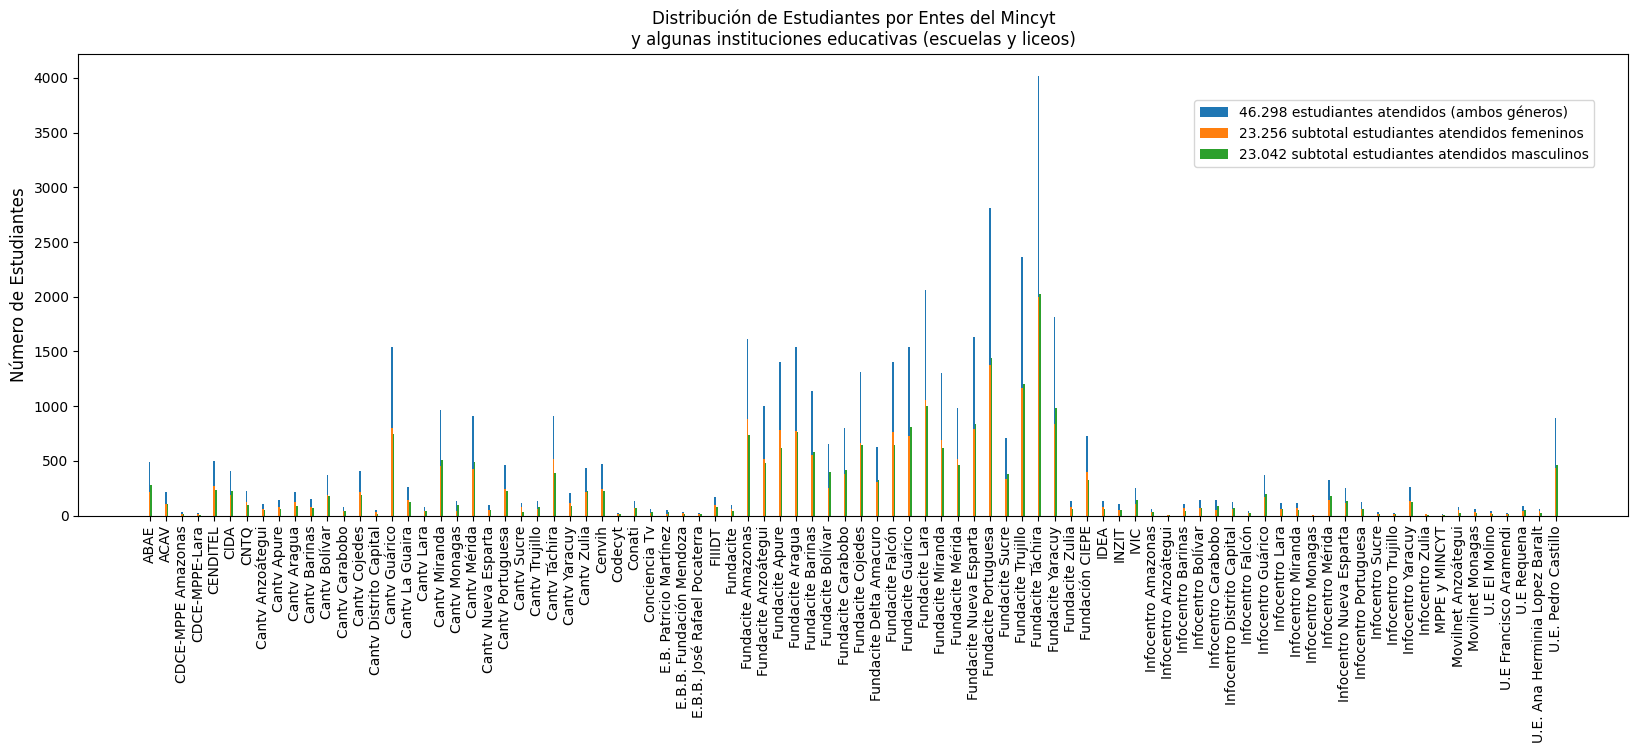

In [ ]:
#@title comportamiento de las métricas de los estudiantes por entes y género
import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(20, 6))

# Configurar el ancho de las barras
bar_width = 0.1

# Posición de las barras en el eje x
x_pos = np.arange(len(df_tabla.index))

# Crear las etiquetas de valores para cada variable en la leyenda del gráfico
bartotal = plt.bar(x_pos + bar_width, df_tabla['Número de estudiantes'], bar_width,
              label= '{:,.0f}'.format(
                  df_tabla['Número de estudiantes'].sum()).replace(
                      ",", "x").replace(".", ",").replace(
                          "x", ".")+' '+'estudiantes atendidos (ambos géneros)')
bartotal_fem = plt.bar(x_pos + bar_width, df_tabla['Número de estudiantes femeninos'],
              bar_width,
              label='{:,.0f}'.format(df_tabla['Número de estudiantes femeninos'].sum(
                  )).replace(",", "x").replace(".", ",").replace(
                      "x", ".")+' '+'subtotal estudiantes atendidos'+' '+'femeninos')
bartotal_masc = plt.bar(x_pos + bar_width * 2, df_tabla['Número de estudiantes masculinos'],
              bar_width,
              label='{:,.0f}'.format(df_tabla['Número de estudiantes masculinos'].sum(
              )).replace(",", "x").replace(".", ",").replace(
                  "x", ".")+' '+'subtotal estudiantes atendidos'+' '+'masculinos')

# Agregar etiquetas y título al gráfico
plt.xticks(x_pos + bar_width, df_tabla.index, rotation=90)
plt.title('Distribución de Estudiantes por Entes del Mincyt\n\
y algunas instituciones educativas (escuelas y liceos)', fontsize=12)
#plt.xlabel('Ente', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)

# Agregar leyenda
leyenda= plt.legend(bbox_to_anchor=(0.72, 0.9),
                    loc='upper left', borderaxespad=0)


'''# chunk experimental para agregar etiquetas de valores totales junto a la leyenda
plt.text(0.80, 0.875, str(int(df_tabla['Número de estudiantes'].sum(
    )))+' '+'estudiantes (total)', ha='left', va='center',
         transform=ax.transAxes)
plt.text(0.80, 0.825, str(int(df_tabla['Número de estudiantes femeninos'].sum(
    )))+' '+'estudiantes (subtotal)', ha='left', va='center',
         transform=ax.transAxes)
plt.text(0.80, 0.775, str(int(df_tabla['Número de estudiantes masculinos'].sum(
    )))+' '+'estudiantes (subtotal)', ha='left', va='center',
         transform=ax.transAxes)'''

# Mostrar el gráfico
plt.show()

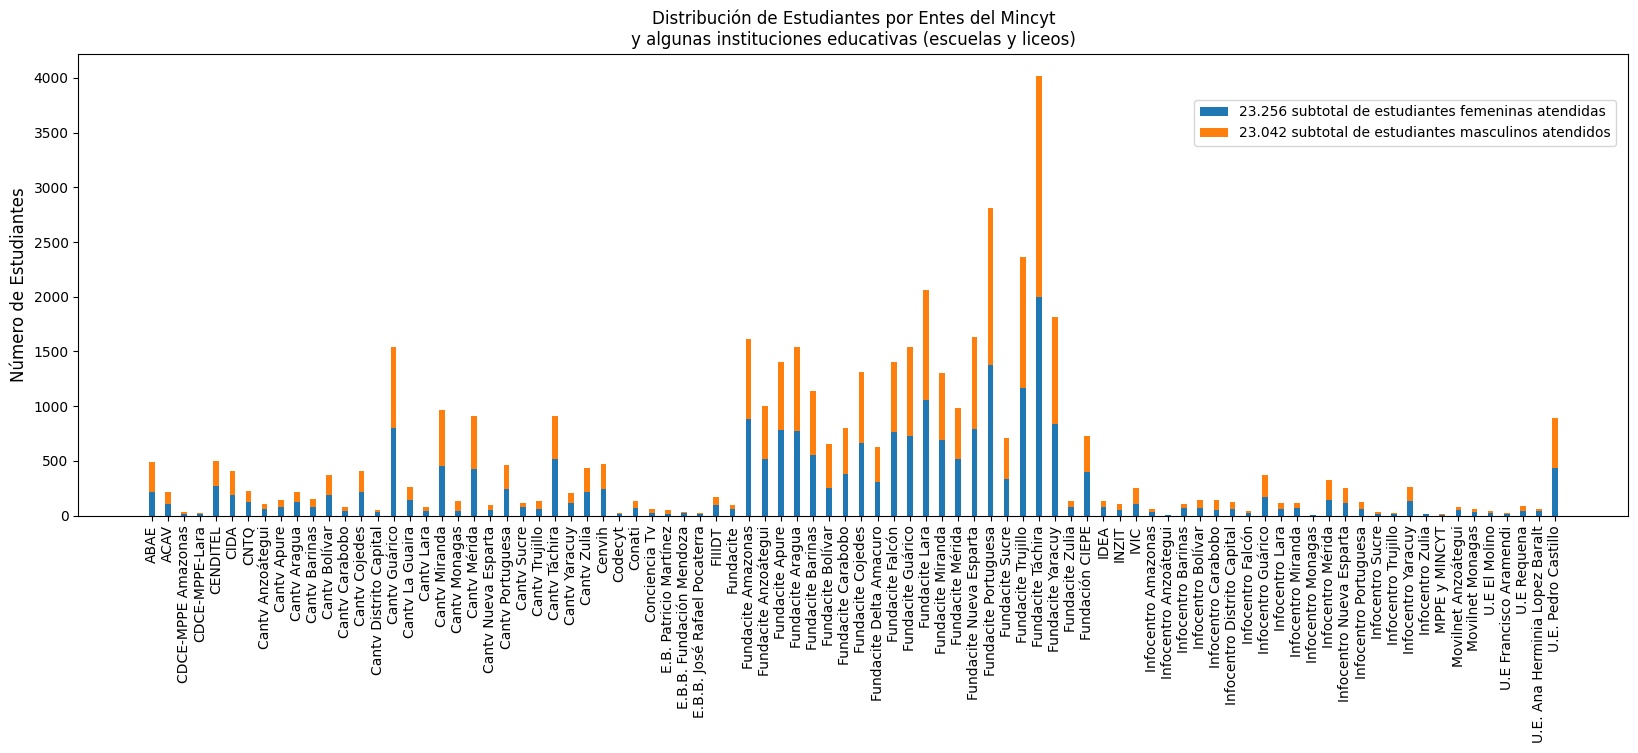

In [ ]:
# Probando como se ve el gráfico con las barras apiladas
fig, ax = plt.subplots(figsize=(20, 6))

# Configurar el ancho de las barras
bar_width = 0.35

# Posición de las barras en el eje x
x_pos = np.arange(len(df_tabla.index))

# Crear las etiquetas de valores para cada variable en la leyenda del gráfico
bartotal_fem = plt.bar(x_pos, df_tabla['Número de estudiantes femeninos'], bar_width,
              label='{:,.0f}'.format(df_tabla['Número de estudiantes femeninos'].sum(
                  )).replace(",", "x").replace(".", ",").replace(
                      "x", ".")+' '+'subtotal de estudiantes femeninas atendidas')
bartotal_masc = plt.bar(x_pos, df_tabla['Número de estudiantes masculinos'],
              bar_width, bottom=df_tabla['Número de estudiantes femeninos'],
              label='{:,.0f}'.format(df_tabla['Número de estudiantes masculinos'].sum(
              )).replace(",", "x").replace(".", ",").replace(
                  "x", ".")+' '+'subtotal de estudiantes masculinos atendidos')

# Agregar etiquetas y título al gráfico
plt.xticks(x_pos, df_tabla.index, rotation=90)
plt.title('Distribución de Estudiantes por Entes del Mincyt\n\
y algunas instituciones educativas (escuelas y liceos)', fontsize=12)
#plt.xlabel('Ente', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)

# Agregar leyenda
leyenda= plt.legend(bbox_to_anchor=(0.72, 0.9),
                    loc='upper left', borderaxespad=0)

# Mostrar el gráfico
plt.show()


In [ ]:
# Importar la biblioteca pandas
import pandas as pd

# Crear un DataFrame a partir de los datos del gráfico
df = pd.DataFrame({
    'Entes del Mincyt': df_tabla.index,
    'Número de estudiantes': df_tabla['Número de estudiantes'],
    'Número de estudiantes femeninos': df_tabla['Número de estudiantes femeninos'],
    'Número de estudiantes masculinos': df_tabla['Número de estudiantes masculinos']
})

# Mostrar la tabla
print(df)


                                              Entes del Mincyt  \
Ente                                                             
ABAE                                                      ABAE   
ACAV                                                      ACAV   
CDCE-MPPE Amazonas                          CDCE-MPPE Amazonas   
CDCE-MPPE-Lara                                  CDCE-MPPE-Lara   
CENDITEL                                              CENDITEL   
...                                                        ...   
U.E El Molino                                    U.E El Molino   
U.E Francisco Aramendi                  U.E Francisco Aramendi   
U.E Requena                                        U.E Requena   
U.E. Ana Herminia Lopez Baralt  U.E. Ana Herminia Lopez Baralt   
U.E. Pedro Castillo                        U.E. Pedro Castillo   

                                Número de estudiantes  \
Ente                                                    
ABAE                       

In [ ]:
# Convertir el DataFrame a LaTeX
latex_code = df.to_latex()

# Guardar el código LaTeX en un archivo .tex
with open('tabla.tex', 'w') as f:
    f.write(latex_code)

# Usar pdflatex para convertir el archivo .tex a PDF
import os
os.system('pdflatex tabla.tex')


32512

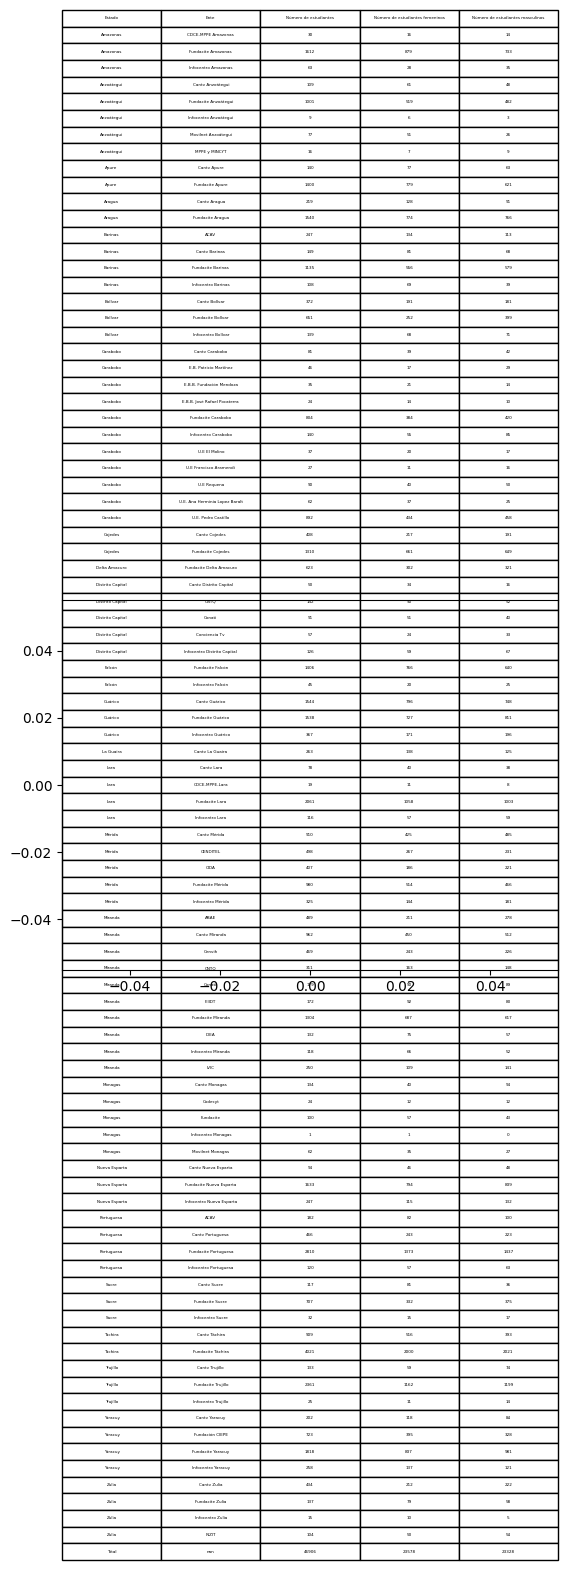

In [ ]:
# Crear una figura con la tabla
fig, ax = plt.subplots(1, 1)
ax.axis('tight')
ax.axis('on')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('tabla.png')


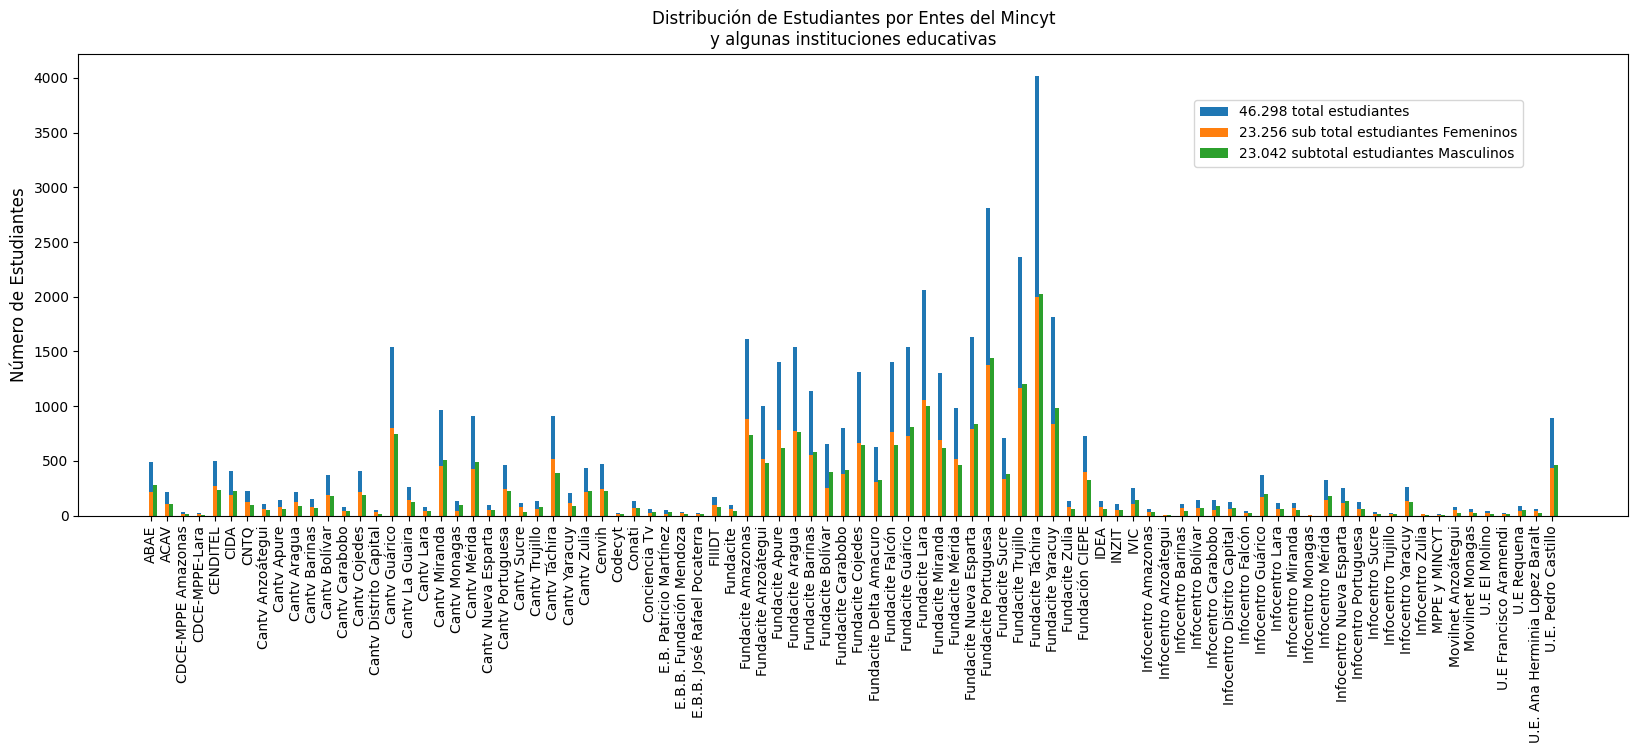

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(20, 6))

# Configurar el ancho de las barras
bar_width = 0.25

# Posición de las barras en el eje x
x_pos = np.arange(len(df_tabla.index))

# Crear las barras para cada variable
bar1 = plt.bar(x_pos + bar_width, df_tabla['Número de estudiantes'], bar_width,
              label='46.298 total estudiantes')
bar2 = plt.bar(x_pos + bar_width, df_tabla['Número de estudiantes femeninos'],
              bar_width,
              label='23.256 sub total estudiantes'+' '+'Femenino'+'s')
bar3 = plt.bar(x_pos + bar_width * 2, df_tabla['Número de estudiantes masculinos'],
              bar_width,
              label='23.042 subtotal estudiantes'+' '+'Masculino'+'s')

# Agregar etiquetas y título al gráfico
plt.xticks(x_pos + bar_width, df_tabla.index, rotation=90)
plt.title('Distribución de Estudiantes por Entes del Mincyt\n\
y algunas instituciones educativas', fontsize=12)
#plt.xlabel('Ente', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)

# Agregar leyenda
leyenda= plt.legend(bbox_to_anchor=(0.72, 0.9),
                    loc='upper left', borderaxespad=0)

'''# Agregar etiquetas de valores totales junto a la leyenda
plt.text(0.80, 0.875, str(int(df_tabla['Número de estudiantes'].sum(
    )))+' '+'estudiantes (total)', ha='left', va='center',
         transform=ax.transAxes)
plt.text(0.80, 0.825, str(int(df_tabla['Número de estudiantes femeninos'].sum(
    )))+' '+'estudiantes (subtotal)', ha='left', va='center',
         transform=ax.transAxes)
plt.text(0.80, 0.775, str(int(df_tabla['Número de estudiantes masculinos'].sum(
    )))+' '+'estudiantes (subtotal)', ha='left', va='center',
         transform=ax.transAxes)'''

# Mostrar el gráfico
plt.show()


In [ ]:
#@title librerías necesarias para crear gráficos con seaborn y plotly
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams # para aumentar el número de tipos de fuentes
import matplotlib.font_manager as fm # idem

In [ ]:
#@title arreglo de la los datos a ser procesados
try:
    df = pd.read_csv(url, skiprows=1)
except FileNotFoundError:
    print("El archivo no se encontró. Por favor, verifica la ruta del archivo.")
    exit()

# Reemplazar los caracteres no ASCII en los nombres de las columnas
df.columns = df.columns.str.replace("�", " ")

# Seleccionar solo las columnas de la G a la K (asumiendo que estas corresponden a las columnas 6 a 10)
df = df.iloc[:, 6:11]

# Seleccionar solo las filas 2 a 94 (asumiendo que la primera fila es 0)
df = df.iloc[1:92] # Nota que he excluido la fila del total (fila 93) para
## obtener resultados correctos

# Renombrar el nombre de variables para dar un aspecto más profesional al
## gráfico
df = df.rename(
    columns={
        "Estado.1":"Estado",
        "Ente.1":"Ente",
        "Número estudiantes (F + M).1": "Número de estudiantes",
        "Número estudiantes (F).1":"Número de estudiantes femeninos",
        "Número estudiantes (M).1":"Número de estudiantes masculinos"
        })


In [ ]:
# Ordenando los datos de mayor a menor
heatmap_data = df.pivot_table(
    index="Estado", values="Número de estudiantes", aggfunc="sum").sort_values(
        by="Número de estudiantes",
        ascending=False)

# Mapa de Calor: Estudiantes Totales (F + M) por Estado
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(
    index="Estado", values="Número de estudiantes",
    aggfunc="sum").sort_values(by="Número de estudiantes", ascending=False)

ax= sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5)
plt.title("Plan de Masificación del Programa Nacional Semilleros Científicos: \n\
estudiantes atendidos entre el 1º enero - 16 mayo 2024")
#plt.xlabel("Número de estudiantes")
plt.ylabel("Estados")
ax.set(xlabel=None)

def set_font(family='sans-serif', size=12):
  """
  Configura la fuente de los gráficos Seaborn.

  Args:
      family (str, optional): Nombre de la familia de fuentes.
          Opciones comunes: 'sans-serif', 'serif', 'monospace', 'Arial', 'Helvetica',
          'Times New Roman', 'Verdana', 'Cambria', 'Georgia', 'Tahoma'.
          Defaults to 'sans-serif'.
      size (int, optional): Tamaño de la fuente. Defaults to 12.
  """
  plt.rc('font', family=family, size=size)
  sns.set_style("whitegrid") # Puedes personalizar el estilo aquí

# Cambio de tipo y tamaño de la fuente
set_font(family='monospace', size=8)

plt.show()

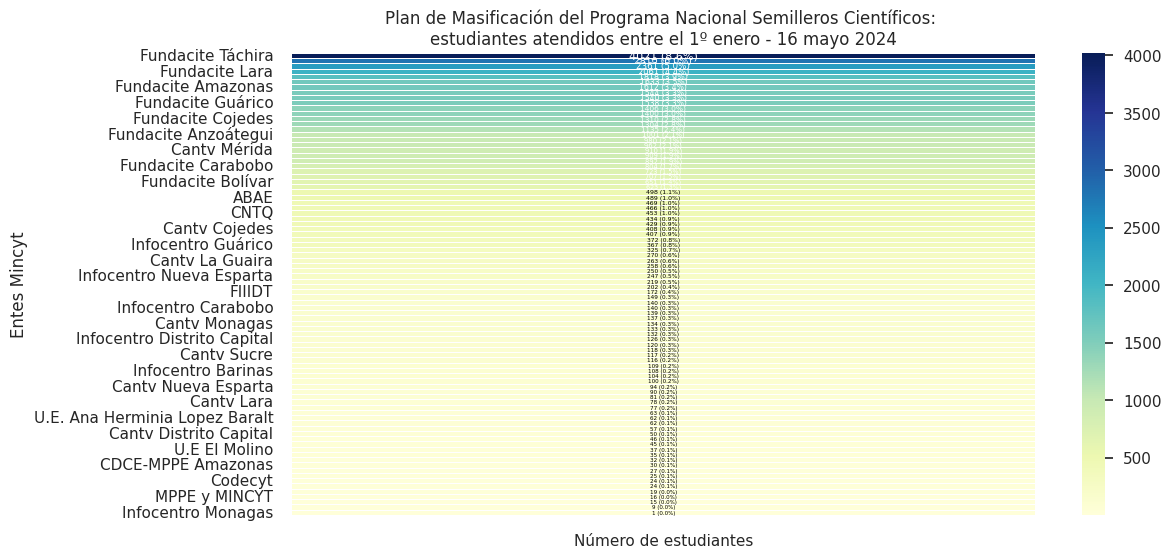

In [ ]:
#@title grafico con variación del tamaño de la fuente de acuerdo a la cantidad de estudiantes por estado
try:
    df = pd.read_csv(url, skiprows=1)
except FileNotFoundError:
    print("El archivo no se encontró. Por favor, verifica la ruta del archivo.")
    exit()

df.columns = df.columns.str.replace("�", " ")
df = df.iloc[:, 6:11]
df = df.iloc[1:92]

df = df.rename(
    columns={
        "Estado.1":"Estado",
        "Ente.1":"Ente",
        "Número estudiantes (F + M).1": "Número de estudiantes",
        "Número estudiantes (F).1":"Número de estudiantes femeninos",
        "Número estudiantes (M).1":"Número de estudiantes masculinos"
    })

heatmap_data = df.pivot_table(
    index="Ente", values="Número de estudiantes", aggfunc="sum").sort_values(
        by="Número de estudiantes",
        ascending=False)

plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(
    index="Ente", values="Número de estudiantes",
    aggfunc="sum").sort_values(by="Número de estudiantes", ascending=False)

# Normaliza los datos para que estén entre 12 y 18
normalized_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
font_sizes = normalized_data * (12 - 8) + 4

# Crea una lista de tamaños de fuente para cada estado
font_sizes_list = font_sizes["Número de estudiantes"].tolist()
sns.set_style("whitegrid")

# Crea el mapa de calor sin anotaciones
ax = sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, linewidths=0.5)

'''# Añade las anotaciones sin porcentajes en proporción al valor y tamaño de fuente deseado
for i, row in enumerate(heatmap_data.values):
    for j, value in enumerate(row):
        # con esto elijo un mejor color de texto para cada valor de los datos
        text_color = "white" if value > heatmap_data.values.mean() else "black"
        plt.text(j+0.5, i+0.5, f'{value:.0f}',
                 color=text_color,
                 ha='center', va='center',
                 fontsize=font_sizes_list[i])'''

# Añade las anotaciones con porcentajes en proporción al valor y tamaño de fuente deseado
for i, row in enumerate(heatmap_data.values):
    for j, value in enumerate(row):
        # Calcula el porcentaje relativo
        percentage = value / heatmap_data.values.sum() * 100
        # Elige el color del texto en función del valor de los datos
        text_color = "white" if value > heatmap_data.values.mean() else "black"
        # Si el valor es el máximo, usa el color blanco para el texto
        if value == heatmap_data.values.max():
            text_color = "white"
        plt.text(j+0.5, i+0.5, f'{value:.0f} ({percentage:.1f}%)',
                 color=text_color,
                 ha='center', va='center',
                 fontsize=font_sizes_list[i])

plt.title("Plan de Masificación del Programa Nacional Semilleros Científicos: \n\
estudiantes atendidos entre el 1º enero - 16 mayo 2024")
plt.ylabel("Entes Mincyt")
ax.set(xlabel=None)

plt.show()

In [ ]:
#@title fuentes disponibles en matplotlib
import matplotlib.font_manager

# Obtiene una lista de las fuentes disponibles
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Imprime la lista de fuentes
print("Fuentes disponibles:")
for font in fonts:
    print(font)


In [ ]:
# tipos de fuentes disponibles en seaborn y matplotlib

**Fuentes disponibles en Seaborn:**

- Arial
- Liberation
- Liberation Sans
- DejaVu Sans
- Bitstream Vera Sans
- Computer Modern
- STIXGeneral
- Lucida Grande

**Fuentes disponibles en Matplotlib:**

- Arial
- Liberation
- Liberation Sans
- DejaVu Sans
- Bitstream Vera Sans
- Computer Modern
- STIXGeneral
- Lucida Grande
- Ubuntu
- Cantarell
- Droid Sans
- Droid Serif
- Noto Sans
- Noto Serif
- Cousine
- PT Sans
- PT Serif
- Roboto
- Source Sans Pro
- Source Serif Pro
- Merriweather
- Lato
- Open Sans
- Oswald
- Roboto Condensed
- Fira Sans
- Fira Sans Condensed
- Cabin
- Oxygen
- Ubuntu Condensed
- Varela Round
- Montserrat
- Raleway
- Open Sans Condensed
- Oswald Stencil
- Roboto Slab
- Fira Mono
- Fira Code
- Source Code Pro
- Anonymous Pro
- Inconsolata
- Monaco
- Consolas
- Courier New
- Andale Mono
- Lucida Console
- Liberation Mono


In [ ]:
#@title  Función para cambiar los tipos y tamaños de fuentes disponibles en matplotlib y seaborn (beta).

import matplotlib.pyplot as plt
def cambiar_font(font_name, font_size):
  """
  Cambia el tipo y tamaño de fuente para matplotlib y seaborn.

  Args:
      font_name (str): Nombre de la fuente a utilizar.
      font_size (int): Tamaño de la fuente.
  """
  plt.style.use('seaborn')
  plt.rc('font', family=font_name)
  plt.rc('axes', titlesize=font_size)
  plt.rc('axes', labelsize=font_size)
  plt.rc('xtick', labelsize=font_size)
  plt.rc('ytick', labelsize=font_size)
  plt.rc('legend', fontsize=font_size)
  plt.rc('figure', titlesize=font_size)
  sns.set(font=font_name)

# Ejemplo de uso:
cambiar_font('Cambria', 12)


<ipython-input-40-fb6e5bfc2adc>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


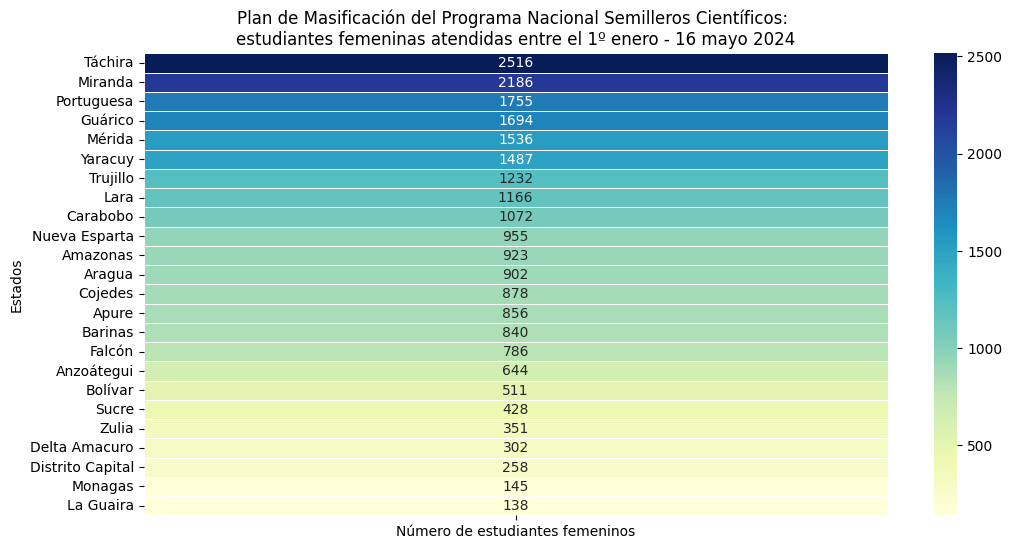

In [ ]:
# Mapa @title de Calor: Estudiantes Totales (F) por Estado
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(
    index="Estado", values="Número de estudiantes femeninos",
    aggfunc="sum").sort_values(by="Número de estudiantes femeninos",
                               ascending=False)

ax= sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5)
plt.title("Plan de Masificación del Programa Nacional Semilleros Científicos: \n\
estudiantes femeninas atendidas entre el 1º enero - 16 mayo 2024")
#plt.xlabel("Número de estudiantes")
plt.ylabel("Estados")
ax.set(xlabel=None)
plt.show()

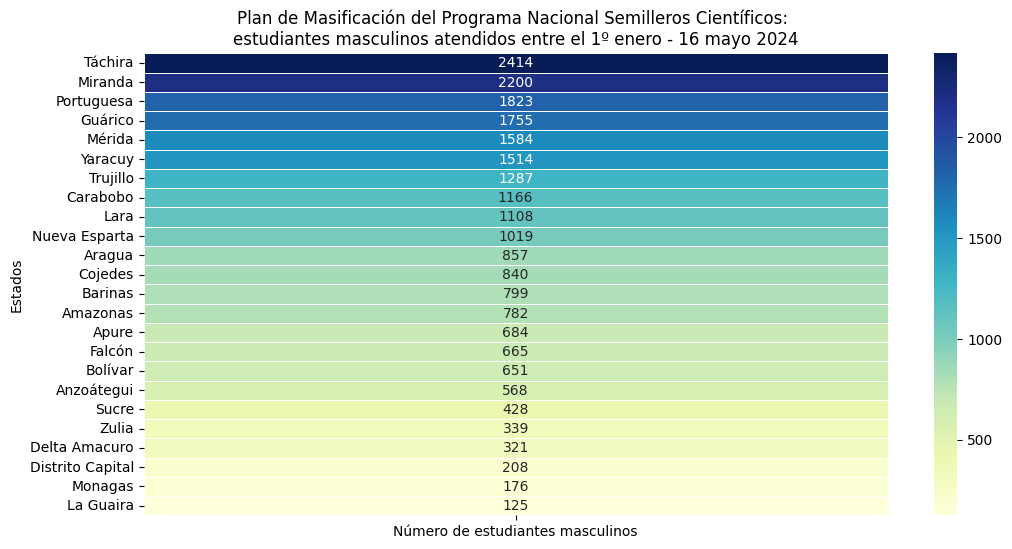

In [ ]:
# @title Mapa de Calor: Estudiantes Totales (M) por Estado
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(
    index="Estado", values="Número de estudiantes masculinos",
    aggfunc="sum").sort_values(by="Número de estudiantes masculinos",
                               ascending=False)

ax= sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5)
plt.title("Plan de Masificación del Programa Nacional Semilleros Científicos: \n\
estudiantes masculinos atendidos entre el 1º enero - 16 mayo 2024")
#plt.xlabel("Número de estudiantes")
plt.ylabel("Estados")
ax.set(xlabel=None)
plt.show()

In [ ]:
#@title Gráfico de barras: Estudiantes Totales (F + M) por Ente en un Estado específico
estado_especifico = "Carabobo"
filtered_data = df[df["Estado.1"] == estado_especifico]
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Número de estudiantes",
    y="Ente.1",
    data=filtered_data,
    hue="Número estudiantes (M).1",
    palette=["#4285f4", "#ea4335", "#fbbc05"],
)
plt.title(f"Distribución de Estudiantes Totales (F + M) por Ente en {estado_especifico}")
plt.xlabel("Número estudiantes (F + M).1")
plt.ylabel("Ente.1")
plt.show()

In [ ]:
#@ title Gráfico de pastel: Proporción de Estudiantes Totales (F + M) a nivel nacional
total_estudiantes = data["Número estudiantes (F + M)"].sum()
f_percentage = (data["Número estudiantes (F)"].sum() / total_estudiantes) * 100
m_percentage = (data["Número estudiantes (M)"].sum() / total_estudiantes) * 100
plt.figure(figsize=(6, 6))
plt.pie(
    [f_percentage, m_percentage],
    labels=["Estudiantes Femeninas", "Estudiantes Masculinos"],
    autopct="%.2f%%",
    colors=["#ff6666", "#ffcc99"],
)
plt.title("Proporción de Estudiantes Totales (F + M) a nivel nacional")
plt.show()